## Relational Plot

### seaborn.relplot
seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
Figure-level interface for drawing relational plots onto a FacetGrid.

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

scatterplot() (with kind="scatter"; the default)

lineplot() (with kind="line")

Extra keyword arguments are passed to the underlying function, so you should refer to the documentation for each to see kind-specific options.

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

See the tutorial for more information.

The default treatment of the hue (and to a lesser extent, size) semantic, if present, depends on whether the variable is inferred to represent “numeric” or “categorical” data. In particular, numeric variables are represented with a sequential colormap by default, and the legend entries show regular “ticks” with values that may or may not exist in the data. This behavior can be controlled through various parameters, as described and illustrated below.

After plotting, the FacetGrid with the plot is returned and can be used directly to tweak supporting plot details or add other layers.

Note that, unlike when using the underlying plotting functions directly, data must be passed in a long-form DataFrame with variables specified by passing strings to x, y, and other parameters.

Parameters
x, ynames of variables in data
Input data variables; must be numeric.

huename in data, optional
Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

sizename in data, optional
Grouping variable that will produce elements with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.

stylename in data, optional
Grouping variable that will produce elements with different styles. Can have a numeric dtype but will always be treated as categorical.

dataDataFrame
Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

row, colnames of variables in data, optional
Categorical variables that will determine the faceting of the grid.

col_wrapint, optional
“Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

row_order, col_orderlists of strings, optional
Order to organize the rows and/or columns of the grid in, otherwise the orders are inferred from the data objects.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

hue_orderlist, optional
Specified order for the appearance of the hue variable levels, otherwise they are determined from the data. Not relevant when the hue variable is numeric.

hue_normtuple or Normalize object, optional
Normalization in data units for colormap applied to the hue variable when it is numeric. Not relevant if it is categorical.

sizeslist, dict, or tuple, optional
An object that determines how sizes are chosen when size is used. It can always be a list of size values or a dict mapping levels of the size variable to sizes. When size is numeric, it can also be a tuple specifying the minimum and maximum size to use such that other values are normalized within this range.

size_orderlist, optional
Specified order for appearance of the size variable levels, otherwise they are determined from the data. Not relevant when the size variable is numeric.

size_normtuple or Normalize object, optional
Normalization in data units for scaling plot objects when the size variable is numeric.

legend“brief”, “full”, or False, optional
How to draw the legend. If “brief”, numeric hue and size variables will be represented with a sample of evenly spaced values. If “full”, every group will get an entry in the legend. If False, no legend data is added and no legend is drawn.

kindstring, optional
Kind of plot to draw, corresponding to a seaborn relational plot. Options are {scatter and line}.

heightscalar, optional
Height (in inches) of each facet. See also: aspect.

aspectscalar, optional
Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

facet_kwsdict, optional
Dictionary of other keyword arguments to pass to FacetGrid.

kwargskey, value pairings
Other keyword arguments are passed through to the underlying plotting function.

Returns
gFacetGrid
Returns the FacetGrid object with the plot on it for further tweaking.

Examples

Draw a single facet to use the FacetGrid legend placement:

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset('tips')

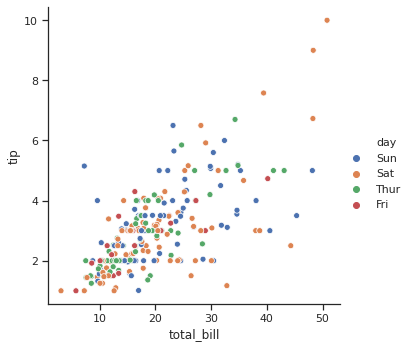

In [9]:
sns.set(style='ticks')
sns.relplot(x='total_bill', y='tip', hue='day', data=tips)
plt.show()

Facet on the columns with another variable:

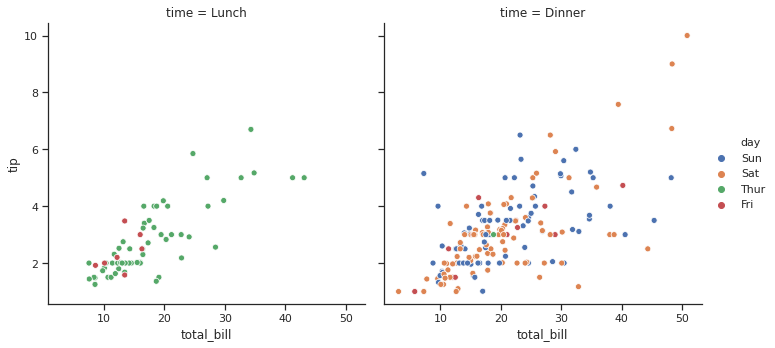

In [11]:
sns.set(style='ticks')
sns.relplot(x='total_bill', y='tip', hue='day', col='time', data=tips)
plt.show()

facet on column and rows

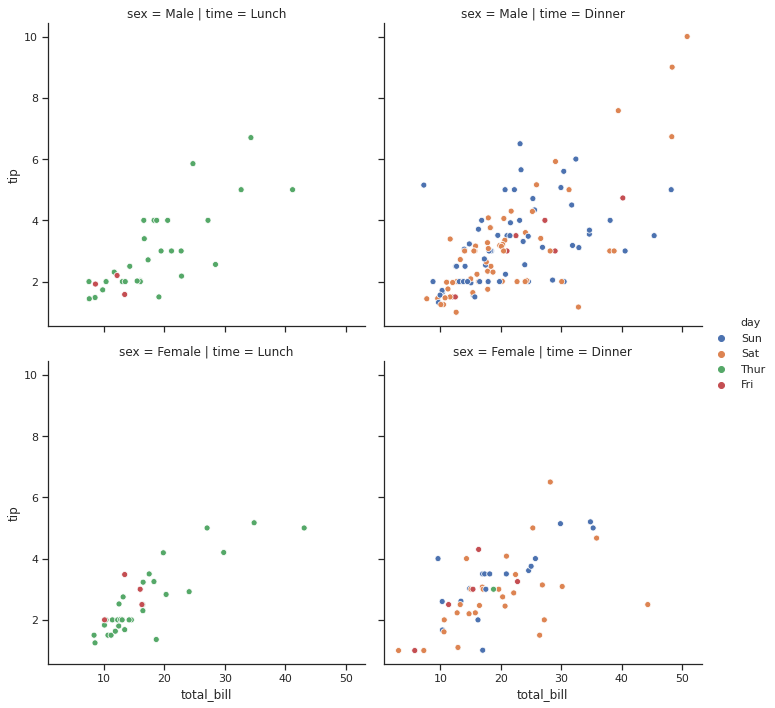

In [16]:
sns.set(style='ticks')
sns.relplot(x='total_bill', y='tip', hue='day'
           ,col='time', row='sex', data=tips)
plt.show()

“Wrap” many column facets into multiple rows:

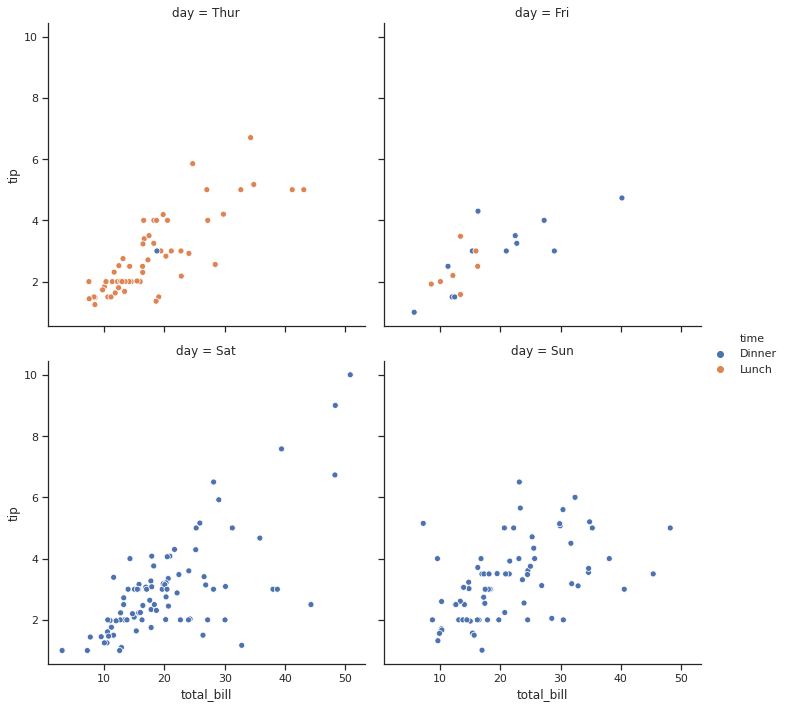

In [22]:
sns.set(style='ticks')
g = sns.relplot(x='total_bill', y='tip', col='day', hue='time', col_wrap=2, data=tips)
plt.show()

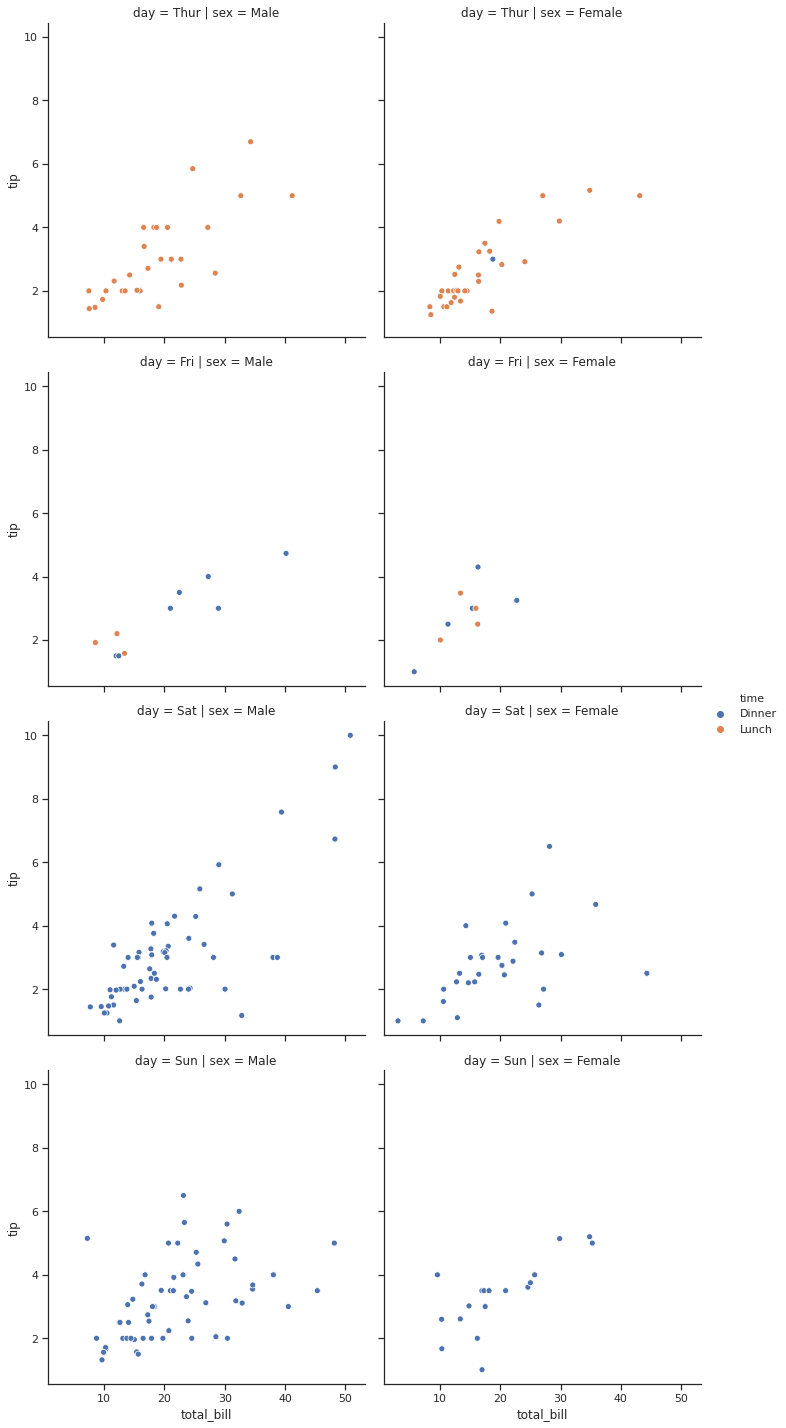

In [21]:
sns.set(style='ticks')
g = sns.relplot(x='total_bill', y='tip', col='sex', hue='time', row='day', data=tips)
plt.show()

Use a different kind of plot:

In [24]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


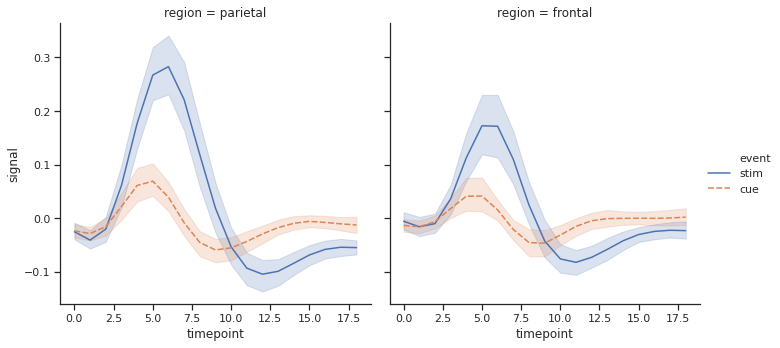

In [26]:
sns.relplot(x='timepoint', y='signal', hue='event', style='event', col='region',kind='line', data=fmri)
plt.show()

Change the size of each facet

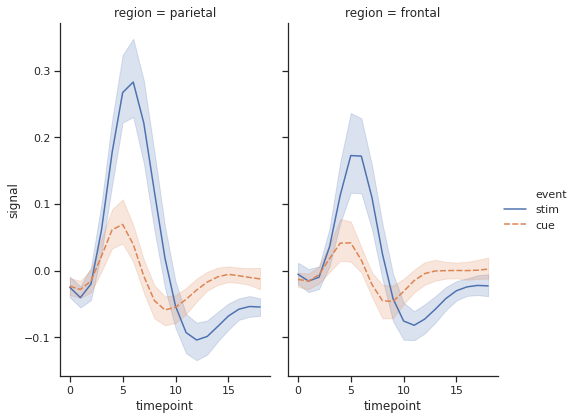

In [32]:
sns.relplot(x='timepoint', y='signal', hue='event', style='event',height=6,aspect=0.6, col='region',kind='line', data=fmri)
plt.show()